In [5]:
from tensorflow.python.keras.models import load_model
import numpy as np
from numpy import argmax
import os
import cv2 #이미지 읽기용
import matplotlib.pyplot as plt

In [ ]:
model = load_model('.h5')

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
list = [[0]*4]*100 # 1 x 4 배열을 100개 만듬
count = 0

In [3]:
img = cv2.imread('testimage.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3,5)
for (x,y,w,h) in faces: #좌표 값과 rectangular의 width height를 받게 된다.
    # x,y값은 rectangular가 시작하는 지점의 좌표
    # x, y값은 좌표값 w,h는 얼굴 높이 너비
    # 원본 이미지에 얼굴의 위치를 표시하는 작업을 함.
    # for문을 돌리는 이유는 여러 개가 검출 될 수 있기 때문.

    list[count][0] = x
    list[count][1] = y
    list[count][2] = w
    list[count][3] = h

    print(list[count])
    count = count + 1

    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

[158, 145, 309, 309]


In [7]:
img.shape

(1050, 700, 3)

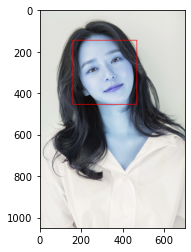

In [6]:
plt.imshow(img)
plt.show()

In [ ]:
#분석 준비
image_size=32
labels=['neutral', 'fear', 'happy', 'sad', 'angry', 'surprise']

#데이터 전처리
analy_image = cv2.imread("") #이미지 읽기
analy_image = cv2.resize(analy_image, (image_size,image_size)) #이미지 사이즈 편집
analy_image = img_to_array(analy_image) #이미지 배열화
analy_image = np.array(analy_image, dtype="float64") / 255.0
print(analy_image.shape, analy_image.shape)

In [ ]:
image_predict = model.predict(analy_image) #사진 분석

In [ ]:
#결과 출력
label = labels[image_predict[0].argmax()]
confidence = image_predict[0][image_predict[0].argmax()]
print('{} {:.2f}%'.format(label, confidence * 100)) 